In [1]:
# pip install imblearn

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [3]:
data=pd.read_csv("employee.csv")
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


In [4]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
department                object
salary                    object
left                       int64
dtype: object

In [5]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64

In [6]:
data.duplicated().sum()

3008

In [7]:
data=data.drop_duplicates()

In [8]:
data.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [9]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department', 'salary', 'left'],
      dtype='object')

In [10]:
department=LabelEncoder()
data['department']=department.fit_transform(data['department'])

salary=LabelEncoder()
data['salary']=salary.fit_transform(data['salary'])

C:\Users\HP\AppData\Local\Temp/ipykernel_22420/1734178696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['department']=department.fit_transform(data['department'])
C:\Users\HP\AppData\Local\Temp/ipykernel_22420/1734178696.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['salary']=salary.fit_transform(data['salary'])


In [11]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,7,1,1
1,0.80,0.86,5,262,6,0,0,7,2,1
2,0.11,0.88,7,272,4,0,0,7,2,1
3,0.72,0.87,5,223,5,0,0,7,1,1
4,0.37,0.52,2,159,3,0,0,7,1,1
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,1,4,0,0
11996,0.74,0.95,5,266,10,0,1,4,0,0
11997,0.85,0.54,3,185,10,0,1,4,0,0
11998,0.33,0.65,3,172,10,0,1,5,0,0


In [13]:
x=data.drop("left",axis=1)
y=data["left"]

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [15]:
from collections import Counter
Counter(y_train)

Counter({0: 8007, 1: 1585})

SMOTE is a upsampling method Synthetic Minority Oversampling Technique

In [16]:
smt = SMOTE()
x_train_smt,y_train_smt=smt.fit_resample(x_train,y_train)
Counter(y_train_smt)

Counter({0: 8007, 1: 8007})

In [17]:
x_train_smt.shape

(16014, 9)

In [21]:
model1 =DecisionTreeClassifier()
model1.fit(x_train_smt,y_train_smt)
print("Test score",model1.score(x_test,y_test))
print("Train score",model1.score(x_train_smt,y_train_smt))
y_pred1=model1.predict(x_test)
print("Error",mean_squared_error(y_test,y_pred1))

Test score 0.9395581492288454
Train score 1.0
Error 0.060441850771154645


In [22]:
model1.get_depth()

25

In [28]:
model2=DecisionTreeClassifier(max_depth=10)
model2.fit(x_train_smt,y_train_smt)
print("Test score",model2.score(x_test,y_test))
print("Train score",model2.score(x_train_smt,y_train_smt))
# y_pred2=model2.predict(x_test)
# print("Error",mean_squared_error(y_test,y_pred2))

Test score 0.9524802000833681
Train score 0.9743974022730111


In [29]:
model3=DecisionTreeClassifier(max_depth=5)
model3.fit(x_train_smt,y_train_smt)
print("Test score",model3.score(x_test,y_test))
print("Train score",model3.score(x_train_smt,y_train_smt))
y_pred3=model3.predict(x_test)
print("Error",mean_squared_error(y_test,y_pred3))

Test score 0.9312213422259275
Train score 0.9388659922567754
Error 0.06877865777407254


In [31]:
pd.DataFrame({"True Value":y_test,"Predicted values":y_pred3})

,True Value,Predicted values
8053,0,0
6623,0,0
7906,0,1
2815,0,0
6842,0,0
...,...,...
390,1,1
10658,0,0
10510,0,0
4352,0,0


In [34]:
accuracy_score(y_test,y_pred3)

0.9312213422259275

In [35]:
cm=confusion_matrix(y_test,y_pred3)
cm

array([[1857,  136],
       [  29,  377]], dtype=int64)

Text(33.0, 0.5, 'True values')

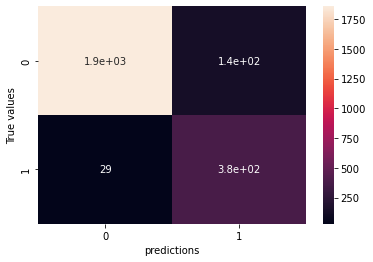

In [38]:
sns.heatmap(cm,annot=True)
plt.xlabel("predictions")
plt.ylabel("True values")